In [35]:
import pandas as pd
import matplotlib.pyplot as plt

energy_cancer = pd.read_csv("energy_cancer_statePerYear.csv")
energy_cancer.head()


,State Abbreviation,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2016_LungBronchus,2016_AllSites,2017_LungBronchus,2017_AllSites,2018_LungBronchus,2018_AllSites,2019_LungBronchus,2019_AllSites,2020_LungBronchus,2020_AllSites
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,...,440,3330,450,3600,460,3550,400,3090,400,2960
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,...,4220,27020,3880,26160,4190,27830,4150,28950,4230,28570
2,AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,...,2610,16460,2620,16040,2720,16130,2690,16580,2760,17200
3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,...,3980,32510,3940,35810,4460,34740,4290,37490,4200,36730
4,CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,...,18140,173200,18270,176140,18760,178130,18990,186920,18040,172040


                    2010_AllSites  2011_AllSites  2012_AllSites  \
State Abbreviation                                                
CA                         157320         163480         165810   
FL                         107000         113400         117580   
TX                         101120         105000         110470   
NY                         103340         107260         109440   
PA                          75260          78030          78340   
IL                          63890          65610          65750   
OH                          64450          65060          66560   
MI                          55660          57010          57790   
NC                          45120          48870          51860   
GA                          40480          44580          48130   

                    2013_AllSites  2014_AllSites  2015_AllSites  \
State Abbreviation                                                
CA                         171330         171730         1720

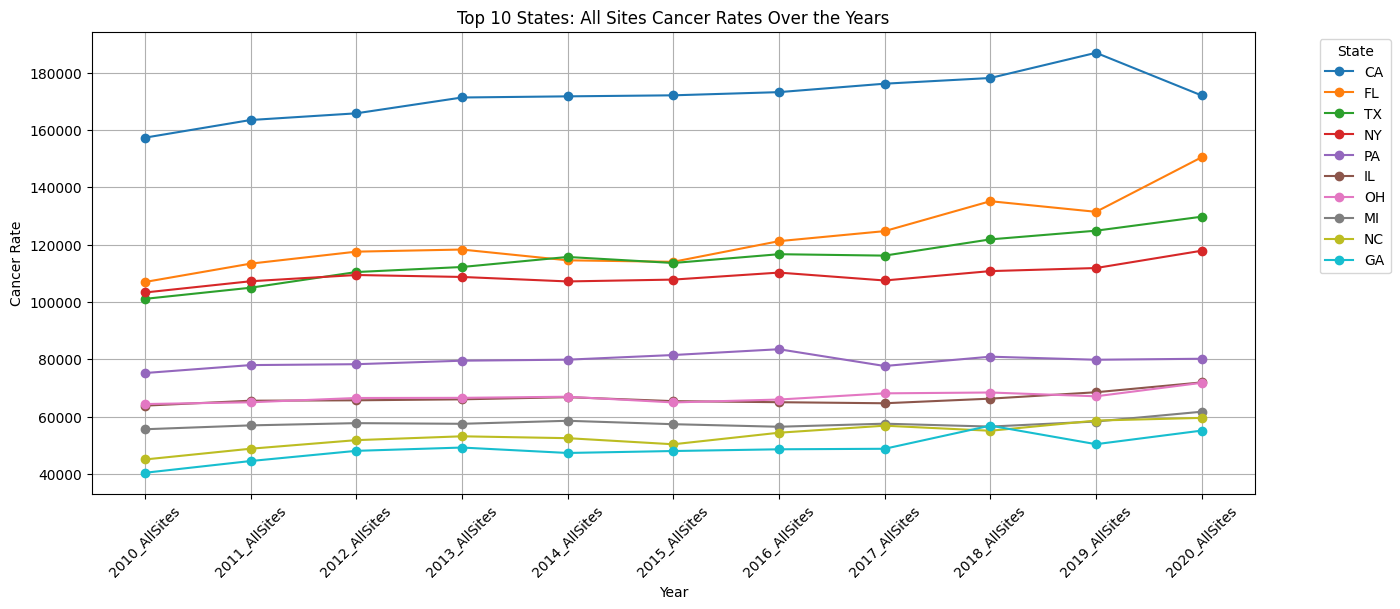

In [63]:
# Assuming energy_cancer is your DataFrame
all_sites = energy_cancer.loc[:, ['State Abbreviation'] + [col for col in energy_cancer.columns if '_AllSites' in col]]

all_sites.set_index('State Abbreviation', inplace=True)
# print(all_sites.head())

# Exclude 'US' row
all_sites = all_sites[all_sites.index != 'US']
# all_sites = all_sites[all_sites.index != 'IL']

# Sort the DataFrame by the latest year (assuming it's the last column)
latest_year = all_sites.columns[-1]
all_sites_sorted = all_sites.sort_values(by=latest_year, ascending=False)

# Select the top 10 rows
top_10_states = all_sites_sorted.head(10)

print(top_10_states)


plt.figure(figsize=(15, 6))
for state in top_10_states.index:
    plt.plot(top_10_states.columns, top_10_states.loc[state], label=state, marker='o', linestyle='-')

plt.title('Top 10 States: All Sites Cancer Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Cancer Rate')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# # Plotting the data
# plt.figure()
# top_10_states.T.plot(kind='line')
# plt.title('Top 10 States: All Sites Cancer Rates Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Cancer Rate')
# plt.legend(title='State')
# plt.grid(True)
# plt.show()


In [48]:
# Read in state population counts
pop = pd.read_csv("state_populations.csv")
pop.rename(columns={'State': 'State Abbreviation'}, inplace=True)

# Merge the 'pop' DataFrame with the 'energy_cancer' DataFrame on the 'State Abbreviation' column
merged_df = pd.merge(energy_cancer, pop, on='State Abbreviation')

# Extract the columns related to cancer rates
cancer_rate_columns = [col for col in merged_df.columns if '_AllSites' in col]

# Divide each value in the cancer rates columns by the corresponding total population
for column in cancer_rate_columns:
    merged_df[column] /= merged_df['Total_Population']

# Define the latest year
latest_year = merged_df.columns[-2]

# Select the top 10 rows
top_10_states = merged_df.sort_values(by=latest_year, ascending=False).head(10)

top_10_states
# Plotting the data with lines
# plt.figure(figsize=(15, 6))
# years = merged_df.columns[2:-1]  # Get the years
# for state in top_10_states['State Abbreviation']:
#     state_data = top_10_states[top_10_states['State Abbreviation'] == state]
#     plt.plot(years, state_data.iloc[0, 2:-1], label=state, marker='o', linestyle='-')

# plt.title('Top 10 States: All Sites Cancer Rates per Capita Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Cancer Rate (per Capita)')
# plt.xticks(rotation=45)
# plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

,State Abbreviation,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2016_AllSites,2017_LungBronchus,2017_AllSites,2018_LungBronchus,2018_AllSites,2019_LungBronchus,2019_AllSites,2020_LungBronchus,2020_AllSites,Total_Population
9,FL,552730,482984,505155,557882,466530,426188,407538,327807,233542,...,0.005629,19000,0.005792,18710,0.006276,18560,0.006104,18150,0.006988,21538187
49,WV,822645,756716,771188,816460,730949,751957,710445,661760,621722,...,0.006562,1980,0.006517,2060,0.006751,2010,0.006935,2030,0.006902,1793716
8,DE,17881,17384,18254,10238,7149,8199,4804,4296,2179,...,0.005687,850,0.005717,890,0.006172,840,0.005930,890,0.006728,989948
40,SC,366160,298572,257319,305656,241217,221865,192751,205204,160703,...,0.005467,4320,0.005603,4630,0.005949,4360,0.005828,4460,0.006195,5118425
38,PA,1212984,1093178,1126118,1039161,878829,734838,669540,644056,568781,...,0.006426,9930,0.005976,10470,0.006226,10380,0.006144,10710,0.006171,13002700
22,MI,691150,621633,658172,618479,617280,471236,499439,506105,447823,...,0.005610,8190,0.005716,8780,0.005616,8070,0.005791,8140,0.006130,10077331
24,MO,825650,768297,806549,780707,696401,639860,709796,668188,584662,...,0.005568,5620,0.005589,5750,0.005771,5490,0.005765,5540,0.006099,6154913
35,OH,1222606,1019140,1104486,1057377,865714,825311,810953,717818,594257,...,0.005595,10660,0.005778,10760,0.005803,9680,0.005691,10110,0.006089,11799448
21,ME,1542,1299,1657,2142,2588,2194,2168,2113,2160,...,0.006804,1380,0.006423,1450,0.006313,1400,0.006547,1430,0.006004,1362359
48,WI,447370,373281,454554,417096,408189,357335,388614,362077,280108,...,0.005594,4280,0.005597,4400,0.005657,4150,0.005806,4290,0.005986,5893718


  State Abbreviation  2010_AllSites  2011_AllSites  2012_AllSites  \
0                 AK           2860           3090           3640   
1                 AL          23640          25530          26440   
2                 AR          15320          16070          16120   
3                 AZ          29780          31550          31990   
4                 CA         157320         163480         165810   

   2013_AllSites  2014_AllSites  2015_AllSites  2016_AllSites  2017_AllSites  \
0           3290           3750           3700           3330           3600   
1          27080          26770          26150          27020          26160   
2          16330          16520          15830          16460          16040   
3          34010          32830          32440          32510          35810   
4         171330         171730         172090         173200         176140   

   2018_AllSites  2019_AllSites  2020_AllSites  Total_Population  
0           3550           3090      

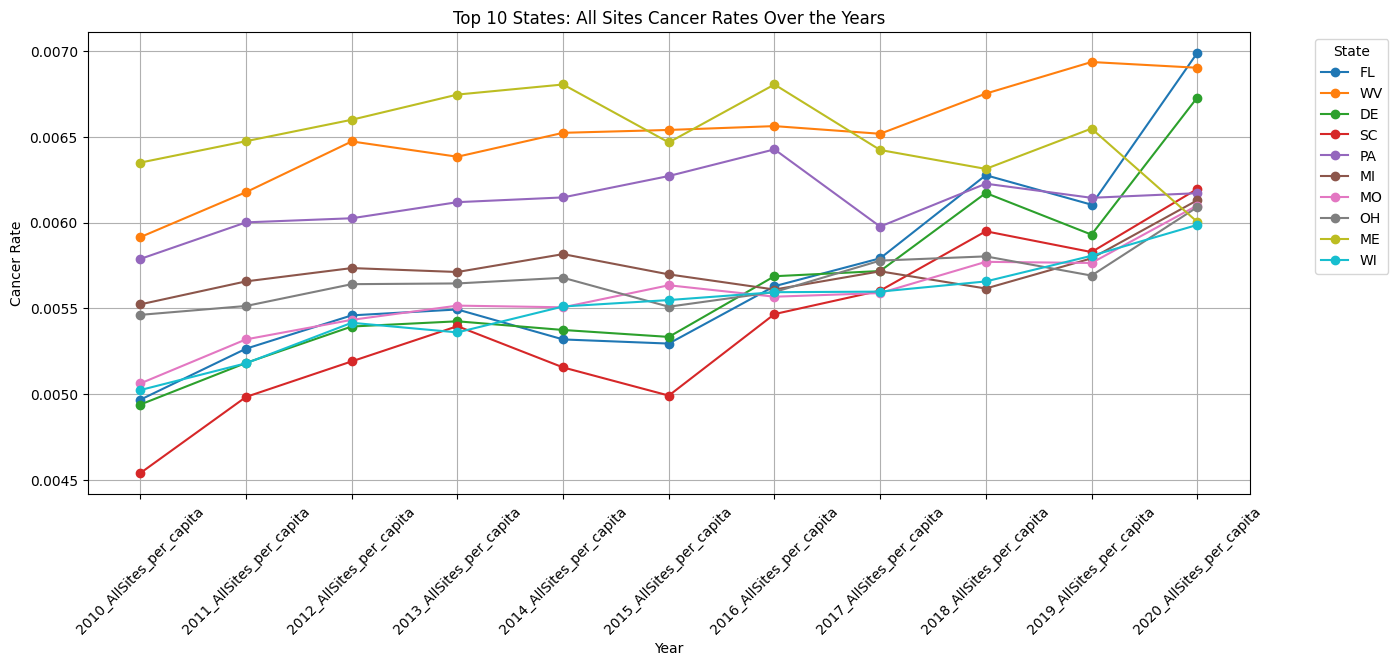

In [62]:
cancer_rate_columns = [col for col in energy_cancer.columns if '_AllSites' in col]

# Select only the columns related to cancer rates and the 'State Abbreviation'
all_sites = energy_cancer[['State Abbreviation'] + cancer_rate_columns]

# Set the 'State Abbreviation' as the index
all_sites.set_index('State Abbreviation', inplace=True)

# Exclude 'US' row
all_sites = all_sites[all_sites.index != 'US']
all_sites = all_sites[all_sites.index != 'DC']

# Merge the 'pop' DataFrame with the 'energy_cancer' DataFrame on the 'State Abbreviation' column
merged_df = pd.merge(all_sites, pop, on='State Abbreviation')

print(merged_df.head())

# Create new calculated columns by dividing each *_AllSites column by the Total_Population column
for column in cancer_rate_columns:
    merged_df[column + '_per_capita'] = merged_df[column] / merged_df['Total_Population']

merged_df.set_index('State Abbreviation', inplace=True)

merged_df = merged_df.iloc[:, -11:]

# Sort the DataFrame by the '2020_AllSites_per_capita' values
merged_df_sorted = merged_df.sort_values(by='2020_AllSites_per_capita', ascending=False)

# Select the top 10 states with the highest '2020_AllSites_per_capita' values
top_10_states = merged_df_sorted.head(10)


print(top_10_states)


plt.figure(figsize=(15, 6))
for state in top_10_states.index:
    plt.plot(top_10_states.columns, top_10_states.loc[state], label=state, marker='o', linestyle='-')

plt.title('Top 10 States: All Sites Cancer Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Cancer Rate')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



# # Sort the DataFrame by the _per_capita values for each state
# sorted_df = merged_df.sort_values(by='_per_capita', ascending=False)

# sorted_df

# # Select the top and bottom 5 states based on the _per_capita values
# top_5_states = sorted_df.head(5)
# bottom_5_states = sorted_df.tail(5)

# # Plotting the data for top 5 states
# plt.figure(figsize=(15, 6))
# for state in top_5_states.index:
#     plt.plot(merged_df.columns[2:len(merged_df.columns)//2], top_5_states.loc[state, [col + '_per_capita' for col in cancer_rate_columns]], label=state, marker='o', linestyle='-')

# plt.title('Top 5 States: Cancer Rates per Capita Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Cancer Rate (per Capita)')
# plt.xticks(rotation=45)
# plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

# # Plotting the data for bottom 5 states
# plt.figure(figsize=(15, 6))
# for state in bottom_5_states.index:
#     plt.plot(merged_df.columns[2:len(merged_df.columns)//2], bottom_5_states.loc[state, [col + '_per_capita' for col in cancer_rate_columns]], label=state, marker='o', linestyle='-')

# plt.title('Bottom 5 States: Cancer Rates per Capita Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Cancer Rate (per Capita)')
# plt.xticks(rotation=45)
# plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()